# Reinforcement Learning course: Homework 1
### The Frozen Lake problem				
It is winter, and you are hiking in the mountains. You end up in an area with a big frozen lake. On the other end of the lake, there is food, and you are hungry and all your resources are done. There is no way to make it back to the city. You need to cross the lake and take the food in order to survive. 

The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you’ll fall into the freezing water. Moreover, there are piles of snow (walls) which you can not step over. However, the ice is slippery, so you won’t always move in the direction you intend. There is 0.8 probability of moving one step in the direction you want vs. 0.2 probability of sliding and going two steps ahead. The actions are UP, DOWN, WEST, EAST.
				
In order to take the optimal actions you need to solve this problem as a discounted MDP with γ= 0.9. We provide you the grid.txt for generating the frozen lake.

**Requirements: Python 3.8 **

**Use the MushroomRL library to solve the problem**


In [1]:
!pip install mushroom_rl

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# utils
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.ion()
# mushroom
from mushroom_rl.environments.generators.grid_world import parse_grid, compute_reward, compute_mu

1. Define the MDP of the provided grid using the FiniteMDP class in Mushroom, and modify it accordingly to acquire the probability transition matrix, the reward, the initial state probability distribution, etc. write a text interface to display the current state (visualize agent in the text grid). Use the given grid.txt to create the MDP.

In [3]:
def generate_frozen_lake_grid(grid, prob, pos_rew, neg_rew, gamma=.9, horizon=100):
    """
    This Frozen Lake Grid World generator requires a .txt file to specify the
    shape of the grid world and the cells. There are five types of cells: 'S' is
    the starting position where the agent is; 'G' is the goal state; '.' is a
    normal cell; '*' is a hole, when the agent steps on a hole, it receives a
    negative reward and the episode ends; '#' is a wall, when the agent is
    supposed to step on a wall, it actually remains in its current state. The
    initial states distribution is uniform among all the initial states
    provided.

    The grid is expected to be rectangular.

    Args:
        grid (str): the path of the file containing the grid structure;
        prob (float): probability of success of an action;
        pos_rew (float): reward obtained in goal states;
        neg_rew (float): reward obtained in "hole" states;
        gamma (float, .9): discount factor;
        horizon (int, 100): the horizon.

    Returns:
        A FrozenLakeFiniteMDP object built with the provided parameters.

    """
    
    # [YOUR CODE]
    grid_map, cell_list = parse_grid(grid)
    p = compute_probabilities_frozenlake(grid_map, cell_list, prob)
    rew = compute_reward(grid_map, cell_list, pos_rew, neg_rew)
    mu = compute_mu(grid_map, cell_list)

    return FrozenLakeFiniteMDP(p, rew, mu, gamma, horizon), grid_map, cell_list
    


In [115]:
def compute_probabilities_frozenlake(grid_map, cell_list, prob):
    """
    Compute the transition probability matrix.

    Args:
        grid_map (list): list containing the grid structure;
        cell_list (list): list of non-wall cells;
        prob (float): probability of success of an action.

    Returns:
        The transition probability matrix;

    """
    # HINT: Look at the implementation of compute_probabilities in mushroom_rl.environments.generators.grid_world
    
    # [YOUR CODE]
    g = np.array(grid_map)
    c = np.array(cell_list)
    n_states = len(cell_list)
    p = np.zeros((n_states, 4, n_states))
    directions = [[-1, 0], [1, 0], [0, -1], [0, 1]]
    
    for i in range(len(c)):
        state = c[i]
        #print(state)
        if g[tuple(state)] in ['.', 'S']:
            for a in range(len(directions)):
                new_state = state + directions[a]
                j = np.where((c == new_state).all(axis=1))[0]
                slip_state = new_state + directions[a]
                j2 = np.where((c == slip_state).all(axis=1))[0]
                
                if j.size > 0:
                    assert j.size == 1
                    
                    if (j2.size > 0):
                        assert j2.size == 1

                        p[i, a, j] = prob
                        p[i, a, j2] = 1. - prob

                    else:
                        p[i, a, j] = 1.
                else:
                    p[i, a, i] = 1.
                    # prob nicht success not, sondern double?
                    
    return p


In [116]:
from mushroom_rl.core import Environment, MDPInfo
from mushroom_rl.utils import spaces
from mushroom_rl.environments.finite_mdp import FiniteMDP
from mushroom_rl.utils.viewer import Viewer

class FrozenLakeFiniteMDP(FiniteMDP):
    """
    Frozen Lake Finite Markov Decision Process.

    """
    
    
    @staticmethod
    def convert_to_grid(state, width):
        return np.array([state[0] // width, state[0] % width])
    
    def render(self, grid_map, state):
        list_state = self.convert_to_grid(state, 10)
        i = 0
        for row in grid_map:
            if list_state[0] == i:
                row[list_state[1]] += 'A'
            print(row)
            i += 1
    pass


        
        

In [117]:
grid = "grid.txt"
prob = 0.8
pos_rew = 1.0
neg_rew = -1.0
gamma = 0.99
horizon = 100
mdp, grid_map, cell_list = generate_frozen_lake_grid(grid, prob = prob, pos_rew = pos_rew, neg_rew= neg_rew, gamma= gamma, horizon = horizon)
state = mdp.reset()
mdp.render(grid_map, state)

[0 0]
[0 1]
[0 3]
[0 4]
[0 5]
[0 7]
[0 8]
[1 0]
[1 1]
[1 2]
[1 3]
[1 4]
[1 5]
[1 7]
[1 8]
[1 9]
[2 1]
[2 3]
[2 4]
[2 5]
[2 6]
[2 7]
[2 8]
[2 9]
[3 0]
[3 1]
[3 2]
[3 4]
[3 5]
[3 6]
[3 7]
[3 8]
[3 9]
[4 0]
[4 1]
[4 2]
[4 3]
[4 4]
[4 5]
[4 7]
[4 8]
[4 9]
[5 0]
[5 1]
[5 2]
[5 3]
[5 4]
[5 6]
[5 7]
[5 8]
[5 9]
[6 2]
[6 3]
[6 5]
[6 8]
[6 9]
[7 0]
[7 1]
[7 2]
[7 3]
[7 4]
[7 5]
[7 8]
[8 0]
[8 1]
[8 2]
[8 3]
[8 4]
[8 5]
[8 6]
[8 7]
[8 8]
[8 9]
[9 1]
[9 2]
[9 3]
[9 4]
[9 5]
[9 6]
[9 8]
[9 9]
['SA', '.', '#', '.', '*', '.', '#', '*', '.', '#']
['.', '.', '.', '.', '.', '.', '#', '.', '.', '.']
['#', '.', '#', '*', '.', '.', '.', '.', '.', '.']
['.', '.', '*', '#', '.', '.', '.', '.', '.', '*']
['*', '.', '.', '.', '*', '*', '#', '.', '.', '.']
['.', '.', '.', '.', '*', '#', '*', '*', '.', '.']
['#', '#', '.', '.', '#', '*', '#', '#', '.', '*']
['*', '.', '.', '.', '.', '*', '#', '#', '.', '#']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['#', '.', '.', '*', '.', '.', '*', '#', '.', 'G']


### Dynamic programming on The Frozen Lake
1. Solve the frozen lake problem with Policy Iteration (PI) and Value Iteration (VI). Report the value function and the optimal policy for PI and VI. Compare the results. What do you observe?


In [7]:
from mushroom_rl.solvers.dynamic_programming import policy_iteration, value_iteration

In [8]:
print(value_iteration(mdp.p, mdp.r, gamma, 0.1))
print(policy_iteration(mdp.p, mdp.r, gamma))

[0.83172241 0.86052679 0.70406351 0.         0.89756981 0.
 0.9261367  0.86052679 0.87297579 0.88165145 0.88944173 0.89702037
 0.90452113 0.92227653 0.93392157 0.92227653 0.88165145 0.
 0.90760428 0.91520385 0.9230537  0.93002902 0.94177184 0.93002902
 0.70406351 0.88944173 0.         0.90010038 0.90749947 0.91603872
 0.91919353 0.94968823 0.         0.         0.89702037 0.90760428
 0.90010038 0.         0.         0.94572949 0.95767052 0.94572949
 0.89756981 0.90452113 0.91520385 0.90749947 0.         0.
 0.         0.96572311 0.7648527  0.9230537  0.91603872 0.
 0.97382736 0.         0.         0.92227653 0.93002902 0.91919353
 0.94572949 0.         0.98208    0.9261367  0.93392157 0.94177184
 0.94968823 0.95767052 0.96572311 0.97382736 0.98208    0.99
 1.         0.92227653 0.93002902 0.         0.94572949 0.7648527
 0.         1.         0.        ]
(array([0.85882513, 0.86750013, 0.70453027, 0.        , 0.89759635,
       0.        , 0.9261367 , 0.86750013, 0.87479201, 0.88214576

 Value_iteration and policy_iteration give a similar optimal value matrix (in form of an array)
 as output, but policy_iteration additionally outputs a policy (which does not seem right,
 as it wants to go through the first wall, go up, if it is right left of the goal, etc)


2. Modify the Policy Iteration method in Mushroom so that it can accept a policy initialization and stopping criterion (in terms of number of iterations). Initialize with a policy that always goes EAST. Compare the obtained Value Function and Policy compared to your result in q.1. What do you observe?


In [10]:
def frozen_lake_policy_iteration(prob, reward, gamma, initial_policy = None, n_iterations = -1):
    """
    Policy iteration algorithm to solve a dynamic programming problem.

    Args:
        prob (np.ndarray): transition probability matrix;
        reward (np.ndarray): reward matrix;
        gamma (float): discount factor.
        initial_policy (int  or np.ndarray): value to intialize the policy.
                        if np.ndarray is provided, use it as the initial policy.
        n_iterations (int): number of iterations to run the algorithm. 
                    if -1 is provided, the stopping criterion is the convergence.

    Returns:
        The optimal value of each state and the optimal policy.

    """
    
    n_states = prob.shape[0]
    n_actions = prob.shape[1]
    
    # policy 
    if initial_policy is None:
        policy = np.zeros(n_states, dtype=int)
    elif type(initial_policy) is int:
        policy = np.zeros(n_states, dtype=int)
        for i in range(len(policy)):
            policy[i] = initial_policy
    else:
        policy = initial_policy
    
    value = np.zeros(n_states)

    if type(n_iterations) is int and n_iterations > 0:
        changed = True
        for i in range(n_iterations):
            p_pi = np.zeros((n_states, n_states))
            r_pi = np.zeros(n_states)
            i = np.eye(n_states)

            for state in range(n_states):
                action = policy[state]
                p_pi_s = prob[state, action, :]
                r_pi_s = reward[state, action, :]

                p_pi[state, :] = p_pi_s.T
                r_pi[state] = p_pi_s.T.dot(r_pi_s)

            value = np.linalg.inv(i - gamma * p_pi).dot(r_pi)

            changed = False

            for state in range(n_states):
                vmax = value[state]
                for action in range(n_actions):
                    if action != policy[state]:
                        p_sa = prob[state, action]
                        r_sa = reward[state, action]
                        va = p_sa.T.dot(r_sa + gamma * value)
                        if va > vmax and not np.isclose(va, vmax):
                            policy[state] = action
                            vmax = va
                            changed = True
            
            if changed == False:
                break
                
    else:
        changed = True
        while changed:
            p_pi = np.zeros((n_states, n_states))
            r_pi = np.zeros(n_states)
            i = np.eye(n_states)

            for state in range(n_states):
                action = policy[state]
                p_pi_s = prob[state, action, :]
                r_pi_s = reward[state, action, :]

                p_pi[state, :] = p_pi_s.T
                r_pi[state] = p_pi_s.T.dot(r_pi_s)

            value = np.linalg.inv(i - gamma * p_pi).dot(r_pi)

            changed = False

            for state in range(n_states):
                vmax = value[state]
                for action in range(n_actions):
                    if action != policy[state]:
                        p_sa = prob[state, action]
                        r_sa = reward[state, action]
                        va = p_sa.T.dot(r_sa + gamma * value)
                        if va > vmax and not np.isclose(va, vmax):
                            policy[state] = action
                            vmax = va
                            changed = True

    return value, policy
    
    
    pass

In [11]:
frozen_lake_policy_iteration(mdp.p, mdp.r, gamma, 1, -1)

(array([0.85882513, 0.86750013, 0.70453027, 0.        , 0.89759635,
        0.        , 0.9261367 , 0.86750013, 0.87479201, 0.88214576,
        0.88955842, 0.89704792, 0.90452763, 0.92227666, 0.93392157,
        0.92227666, 0.88214576, 0.        , 0.90760653, 0.91520438,
        0.92305383, 0.93002905, 0.94177184, 0.93002905, 0.70453027,
        0.88955842, 0.        , 0.90011892, 0.90750385, 0.91603975,
        0.91919378, 0.94968823, 0.        , 0.        , 0.89704792,
        0.90760653, 0.90011892, 0.        , 0.        , 0.94572949,
        0.95767052, 0.94572949, 0.89759635, 0.90452763, 0.91520438,
        0.90750385, 0.        , 0.        , 0.        , 0.96572311,
        0.7648527 , 0.92305383, 0.91603975, 0.        , 0.97382736,
        0.        , 0.        , 0.92227666, 0.93002905, 0.91919378,
        0.94572949, 0.        , 0.98208   , 0.9261367 , 0.93392157,
        0.94177184, 0.94968823, 0.95767052, 0.96572311, 0.97382736,
        0.98208   , 0.99      , 1.        , 0.92

 We have a lot more 1s, where we have had 0s (e.g. 4, last two zeros), and some more 3s, suggesting a more efficient policy
 (more movement right and down)


3. Take the policy of Iteration #5 from q.2 of PI. Do Monte Carlo Policy Evaluation (first visit). 


In [135]:
from random import random 

class monte_carlo():

    def run(self, state):
        print(self.visited[0])
        if self.g[tuple(state)] in ['G']:
            print('goal')
            mc_value = +1
        elif self.g[tuple(state)] in ['*']:
            print('hole')
            mc_value = -1
        else: 
            direction = self.pol[cell_list.index(state)]
            #print(direction)
            new_state = [state[0] + self.directions[direction][0],state[1] + self.directions[direction][1]]
            #print(new_state)
            new_state_number = np.where((self.c == new_state).all(axis=1))[0]
            # one walk exists, otherwise 0
            if (self.c == new_state_number).any():
                #print(new_state)
                # check absorbing
                if self.g[tuple(new_state)] in ['G']:
                    mc_value = self.gamma * self.run(new_state)
                elif self.g[tuple(new_state)] in ['*']:
                    mc_value = self.gamma * self.run(new_state)
                else:
                    # check if slip exists
                    new_state_slip = [new_state[0] + self.directions[direction][0],new_state[1] + self.directions[direction][1]]
                    #print(new_state_slip)
                    new_state_slip_number = np.where((self.c == new_state_slip).all(axis=1))[0]
                    #print(new_state_slip_number)
                    if new_state_slip_number.size > 0:
                        if random() < 0.8:
                #            print('random1')
                            if new_state in self.visited[0]:
               #                 print('we visited 1?')
              #                  print(new_state)
                                mc_value = 0
                            else: 
             #                   print('new 1!')
            #                    print(new_state)
                                self.visited[0][new_state_number] = new_state_number
                                mc_value = self.gamma * self.run(new_state)
                        else:
                 #           print('random2')
                  #          print(new_state_slip)
                            if new_state_slip in self.visited[0]:
                                mc_value = 0
                            else: 
                                self.visited[0][new_state_number] = new_state_number
                                mc_value = self.gamma * self.run(new_state_slip)


                    # if no slip, only new_state
                    elif new_state_number in self.visited[0]:
                        mc_value = 0
                    else:
                        self.visited[0][new_state_number] = new_state_number
                        mc_value = self.gamma * self.run(new_state)
        
            else: 
                mc_value = 0
        if mc_value != 0:        
            state_number = np.where((self.c == state).all(axis=1))[0]        
            self.visited[1][state_number] = mc_value
            print('unequal 0!')
        return mc_value
    
    def __init__(self, cell_list, grid_map, pol, val, gamma, iterations):
        self.g = np.array(grid_map)
        self.c = np.array(cell_list)
        self.pol = pol
        self.val = val
        self.gamma = gamma
        self.iterations = iterations
        self.rewards = np.zeros((iterations, len(cell_list)))
        start_state = [0,0]
        mc_values = 0
        self.directions = [[-1, 0], [1, 0], [0, -1], [0, 1]]
        
        for i in range(iterations):
            self.visited = np.zeros((2, len(cell_list)))
            
            mc_values += self.run(start_state)
            self.rewards[i] = self.visited[1]
            print('iteration done')
        
        print(self.rewards)
    
    
    
    

        

In [136]:
val, pol = frozen_lake_policy_iteration(mdp.p, mdp.r, gamma, 1, 15)
print(monte_carlo(cell_list, grid_map, pol, val, gamma, 5))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 7. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
iteratio

C:\Users\knarf\AppData\Local\Temp\ipykernel_20524\2064155896.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_state in self.visited[0]:
C:\Users\knarf\AppData\Local\Temp\ipykernel_20524\2064155896.py:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_state_slip in self.visited[0]:


4. Implement the exact policy evaluation using the matrix-based formulation of the Bellman equation and compare it with the approximated one computed in q.3.

In [207]:
from random import random 

class bellman_equ():

    def run(self, state):
        print(self.visited[0])
        if self.g[tuple(state)] in ['G']:
            print('goal')
            mc_value = +1
        elif self.g[tuple(state)] in ['*']:
            print('hole')
            mc_value = -1
        else: 
            direction = self.pol[cell_list.index(state)]
            #print(direction)
            new_state = [state[0] + self.directions[direction][0],state[1] + self.directions[direction][1]]
            #print(new_state)
            new_state_number = np.where((self.c == new_state).all(axis=1))[0]
            # one walk exists, otherwise 0
            if (self.c == new_state_number).any():
                #print(new_state)
                # check absorbing
                if self.g[tuple(new_state)] in ['G']:
                    mc_value = self.gamma * self.run(new_state)
                elif self.g[tuple(new_state)] in ['*']:
                    mc_value = self.gamma * self.run(new_state)
                else:
                    # check if slip exists
                    new_state_slip = [new_state[0] + self.directions[direction][0],new_state[1] + self.directions[direction][1]]
                    #print(new_state_slip)
                    new_state_slip_number = np.where((self.c == new_state_slip).all(axis=1))[0]
                    #print(new_state_slip_number)
                    if new_state_slip_number.size > 0:
                        # both states exist
                #            print('random1')
                            if new_state in self.visited[0]:
               #                 print('we visited 1?')
              #                  print(new_state)
                                mc_value = 0
                            else: 
             #                   print('new 1!')
            #                    print(new_state)
                                self.visited[0][new_state_number] = new_state_number
                                mc_value = 0.8 * self.gamma * self.run(new_state)
                 #           print('random2')
                  #          print(new_state_slip)
                            if new_state_slip in self.visited[0]:
                                slip_mc_value = 0
                            else: 
                                self.visited[0][new_state_number] = new_state_number
                                slip_mc_value = 0.2 * self.gamma * self.run(new_state_slip)
                            mc_value = mc_value + slip_mc_value

                    # if no slip, only new_state
                    elif new_state_number in self.visited[0]:
                        mc_value = 0
                    else:
                        self.visited[0][new_state_number] = new_state_number
                        mc_value = self.gamma * self.run(new_state)
        
            else: 
                mc_value = 0
        if mc_value != 0:        
            state_number = np.where((self.c == state).all(axis=1))[0]        
            self.visited[1][state_number] = mc_value
            print('unequal 0!')
        return mc_value
    
    def __init__(self, cell_list, grid_map, pol, val, gamma, iterations):
        self.g = np.array(grid_map)
        self.c = np.array(cell_list)
        self.pol = pol
        self.val = val
        self.gamma = gamma
        self.iterations = iterations
        self.rewards = np.zeros((iterations, len(cell_list)))
        start_state = [0,0]
        mc_values = 0
        self.directions = [[-1, 0], [1, 0], [0, -1], [0, 1]]
        
        for i in range(iterations):
            self.visited = np.zeros((2, len(cell_list)))
            
            mc_values += self.run(start_state)
            self.rewards[i] = self.visited[1]
            print('iteration done')
        
        print(self.rewards)
    
    
    

print(bellman_equ(cell_list, grid_map, pol, val, gamma, 5))

        

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 7. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0

C:\Users\knarf\AppData\Local\Temp\ipykernel_20524\2430767276.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_state in self.visited[0]:
C:\Users\knarf\AppData\Local\Temp\ipykernel_20524\2430767276.py:47: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_state_slip in self.visited[0]:



 Well, they are the same, though they do not run properly. If they ran properly, then with increasing iterations of MC, 
 it should get closer and closer to the bellman matrix.


### Model-free RL on The Frozen Lake
1. Train the same MDP with Q-Learning, SARSA with $\epsilon$-Greedy and Bolt
zmann policies. Run 25 random seeds and plot the evaluation curves for all combinations of algorithms and policies, when you evaluate the policy every n steps. Plot the evaluation curves average returns J w.r.t. epochs. Explain the differences of the obtained policies.

In [182]:
# mushroom
from mushroom_rl.algorithms.value import SARSA, QLearning
from mushroom_rl.core import Core, Logger
from mushroom_rl.environments import *
from mushroom_rl.policy import Boltzmann, EpsGreedy
from mushroom_rl.utils.parameters import Parameter, ExponentialParameter, LinearParameter
from mushroom_rl.utils.dataset import compute_J
from tqdm import tqdm
from joblib import Parallel, delayed
from mushroom_rl.utils.callbacks import CollectDataset, CollectMaxQ

In [183]:
# Plotting function
import scipy.stats as st


def get_mean_and_confidence(data):
    """
    Compute the mean and 95% confidence interval
    Args:
        data (np.ndarray): Array of experiment data of shape (n_runs, n_epochs).
    Returns:
        The mean of the dataset at each epoch along with the confidence interval.
    """
    mean = np.mean(data, axis=0)
    se = st.sem(data, axis=0)
    n = len(data)
    interval, _ = st.t.interval(0.95, n-1, scale=se)
    return mean, interval


def plot_mean_conf(data, ax, color='blue', line='-', facecolor=None, alpha=0.4, label=None):
    """
    Method to plot mean and confidence interval for data on pyplot axes.
    """
    facecolor = color if facecolor is None else facecolor

    mean, conf = get_mean_and_confidence(np.array(data))
    upper_bound = mean + conf
    lower_bound = mean - conf

    ax.plot(mean, color=color, linestyle=line, label=label)
    ax.fill_between(np.arange(np.size(mean)), upper_bound, lower_bound, facecolor=facecolor, alpha=alpha)

In [184]:
num_run = 25
num_epochs = 200
n_steps = 1000
n_episodes_test = 5

In [185]:
params = {
    'learning_rate': .01,
    'eps': 1.,
    'eps_test': 0.,
    'beta': 100000.,
}

##### Experiment pipeline

In [208]:
def run(pi, agent_class, params, num_epochs=100, n_steps=1000, n_episodes_test=5, seed=1):
    # HINT: Use exponetial decay for EpsGreedy
    # [YOUR CODE]
    # pi = policy
    # agent_class = agent
    print('oh oh')
    # Policy
    #epsilon_test = params['eps_test']
    epsilon = ExponentialParameter(value=params['eps'], exp=.5, size=mdp.info.observation_space.size)
    if pi == 'EpsGreedy':
        pi = EpsGreedy(epsilon=epsilon)
    else:
        pi = Boltzmann(epsilon=epsilon)
    
    # Agent
    learning_rate = ExponentialParameter(value=params['learning_rate'], exp=0.9, size=mdp.info.size)
    algorithm_params = dict(learning_rate=learning_rate)
    if agent_class == 'QLearning':
        agent = QLearning(mdp.info, pi, **algorithm_params)
        print('Q Started!')
    else:
        agent = SARSA(mdp.info, pi, **algorithm_params)
        print('sarsa go!')
    
    # Algorithm
    start = 0
    collect_max_Q = CollectMaxQ(agent.Q, start)
    collect_dataset = CollectDataset()
    callbacks = [collect_dataset, collect_max_Q]
    core = Core(agent, mdp, callbacks)
    
    # Train
    core.learn(n_steps=n_steps, n_episodes_per_fit=5)
    
    _, _, reward, _, _, _ = parse_dataset(collect_dataset.get())
    max_Qs = collect_max_Q.get()
    
    return reward, max_Qs

def experiment(policies, agents, params, num_run=25, num_epochs=100, n_steps=1000, n_episodes_test=5):
    seeds = np.random.randint(0, 1e5, size=(num_run,))  # list of seeds
    data = {}
    # pipeline
    for pi in policies:
        for agent_class in agents:
            Js = Parallel(n_jobs=-1)(delayed(run)(
                pi, agent_class, params,
                num_epochs=num_epochs,
                n_steps=n_steps,
                n_episodes_test=n_episodes_test,
                seed=seeds[i]
            ) for i in range(num_run))
            data[pi.__name__ + '_' + agent_class.__name__] = np.array(Js)
    return data

In [209]:
policies = ['EpsGreedy', 'Boltzmann']
agents = ['QLearning', 'SARSA']
data = experiment(policies, agents, params, num_run=num_run, num_epochs=num_epochs, n_steps=n_steps, n_episodes_test=n_episodes_test)

AssertionError: 

##### Plotting

In [ ]:
fig = plt.figure()
ax = fig.gca()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, v in enumerate(data.items()): 
    plot_mean_conf(v[1], ax, color=colors[i], label=v[0])
plt.legend(loc=4)
plt.xlabel("Epochs")
plt.ylabel("J")

**BONUS**: Visualize the Grid with a GUI (e.g. matplotlib or pygame)

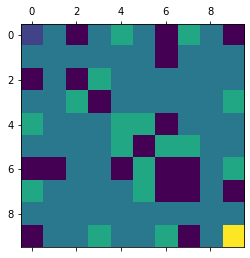

In [210]:
import matplotlib.pyplot as plt

def changed_el(element):
    if str(element).__contains__('G'):
        i = 1
    if str(element).__contains__('S'):
        i = 0.8
    if str(element).__contains__('*'):
        i = 0.6
    if str(element).__contains__('.'):
        i = 0.4
    if str(element).__contains__('A'):
        i = 0.2
    if str(element).__contains__('#'):
        i = 0
    return i

image = [[changed_el(a) for a in row] for row in grid_map]

plt.matshow(image)
plt.show()

In [ ]:
def monte_carlo(cell_list, pol, val, gamma, iterations):
    state_count = np.zeros(len(cell_list))
    state_return = np.zeros(len(cell_list))
    average_return = np.zeros(len(cell_list))
    current_states = cell_list.copy()
    directions = [[-1, 0], [1, 0], [0, -1], [0, 1]]
    c = np.array(cell_list)
    
    for i in range(iterations):
        unvisited_states = cell_list.copy()
        for cell_number in range(len(cell_list)):
            cell = current_states[cell_number]
            if cell in ['G']:
                if cell in unvisited_states:
                    unvisited_states.remove(cell)
                    state_count[cell_number] += 1
                    state_return[cell_number] += 1 * pow(gamma, i)
            elif cell in ['*']:
                if cell in unvisited_states:
                    unvisited_states.remove(cell)
                    state_count[cell_number] += 1
                    state_return[cell_number] += -1 * pow(gamma, i)
            else:
                direction = pol[cell_number]
                new_state = [cell[0] + directions[direction][0],cell[1] + directions[direction][1]]
                new_cell = np.where((c == new_state).all(axis=1))[0]
                
                if direction == 0:
                    new_cell_number = cell_number -1 
                if direction == 1:
                    new_cell_number = cell_number + 1 
                if direction == 2:
                    new_cell_number = cell_number -10 
                if direction == 3:
                    new_cell_number = cell_number + 10
                # checking absorbing states
                if new_cell.size > 0:    
                    if new_cell in ['G']:
                        if (unvisited_states == new_cell).all(1).any():
                            unvisited_states.remove(new_cell)
                            state_count[new_cell_number] += 1
                            state_return[cell_number] += 1  * pow(gamma, i)
                    elif new_cell in ['*']:
                        if (unvisited_states == new_cell).all(1).any():
                            unvisited_states = np.setdiff1d(unvisited_states, new_cell)
                            state_count[new_cell_number] += 1
                            state_return[cell_number] += -1 * pow(gamma, i)
                    else:
                        # not sliding
                        if random() < 0.8:
                            if (unvisited_states == new_cell).any():
                                unvisited_states = np.setdiff1d(unvisited_states, new_cell)
                                state_count[new_cell_number] += 1
                                state_return[cell_number] += average_return[new_cell_number] * pow(gamma, i)
                        # sliding
                        else: 
                            new_cell = cell + 2*directions[direction]
                            if (type(unvisited_states) == list()) and (unvisited_states == new_cell).any():
                                if direction == 0:
                                    new_cell_number = new_cell_number -1 
                                if direction == 1:
                                    new_cell_number = new_cell_number + 1 
                                if direction == 2:
                                    new_cell_number = new_cell_number -10 
                                if direction == 3:
                                    new_cell_number = new_cell_number + 10
                                    
                                if new_cell in ['G']:
                                    if (unvisited_states == new_cell).all(1).any():
                                        unvisited_states = np.setdiff1d(unvisited_states, new_cell)
                                        state_count[new_cell_number] += 1
                                        state_return[new_cell_number] += 1  * pow(gamma, i)
                                elif new_cell in ['*']:
                                    if (unvisited_states == new_cell).all(1).any():
                                        unvisited_states = np.setdiff1d(unvisited_states, new_cell)
                                        state_count[new_cell_number] += 1
                                        state_return[new_cell_number] += -1  * pow(gamma, i)
                                else:
                                    unvisited_states = np.setdiff1d(unvisited_states, new_cell)
                                    state_count[new_cell_number] += 1
                                    state_return[cell_number] += average_return[new_cell_number]  * pow(gamma, i)

        for q in range(len(state_count)):
            if state_count[q] > 0:
                average_return[q] = state_return[q] / state_count[q]
        print('for iteration ') 
        print(i) 
        print(average_return)
        print(state_return) 
        print(state_count)
    return average_return